In [2]:
import scipy.integrate as integrate
from numpy import sin,cos,pi,exp,arange,arccos
from matplotlib import pyplot as plt

<h6 style="text-align:center">*CONCEPT: radiation capture has a sinusoidal dependency on angle of incidence.</h6>

<!--img src="attachment:RadiationIncidence.PNG" width="500"-->
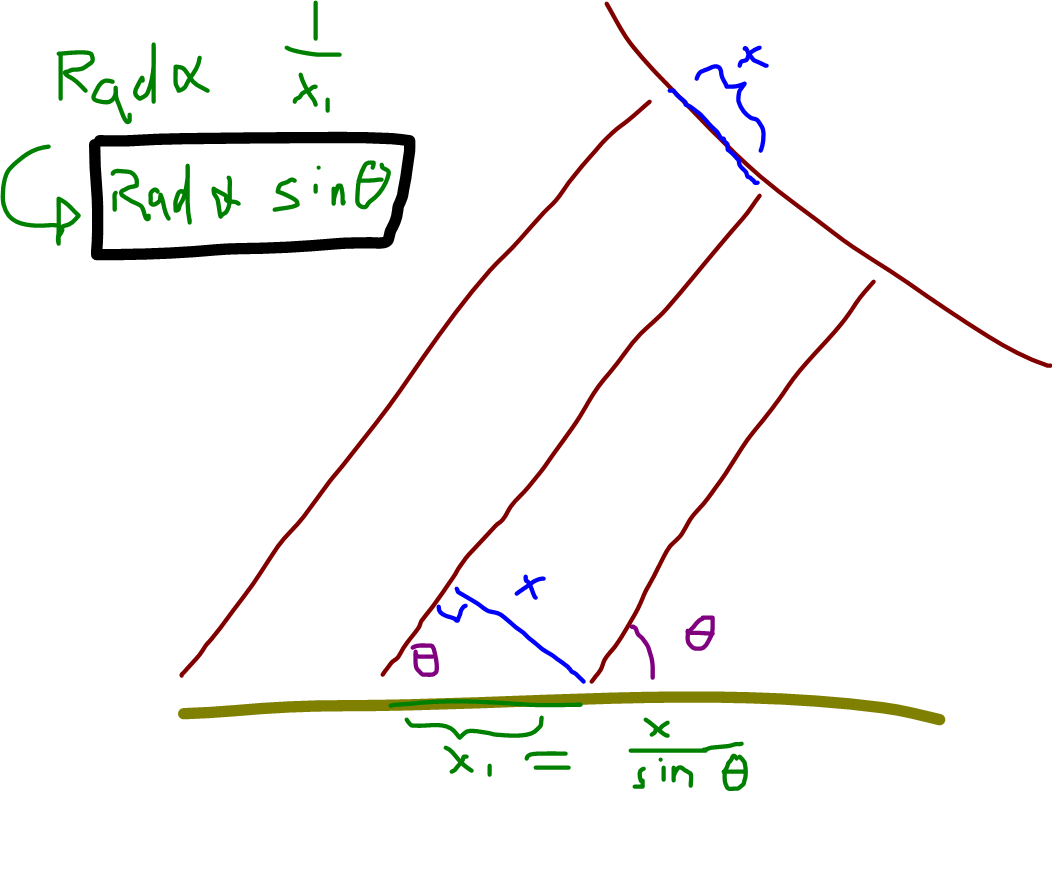

<h1 style="text-align:center">Formula for <a href=https://en.wikipedia.org/wiki/Direct_insolation#Simplified_formula>direct insolation</a> (theta is the zenith angle):</h6>

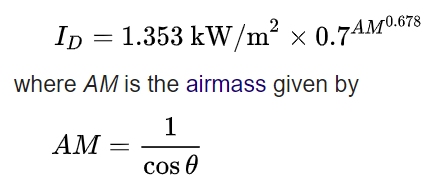

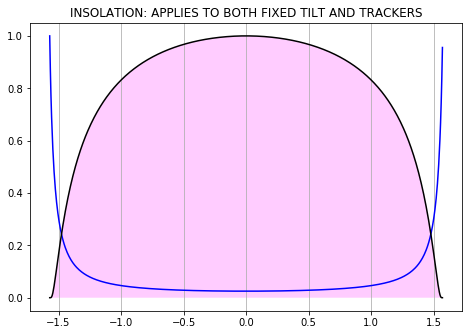

In [2]:
x = arange(-pi/2, pi/2, 0.005)
m=(1/(cos(x)+0.025*exp(-11*cos(x))))/40 #40 was used as max airmass in the literature

y=(exp(1-m)-1)/exp(1/2)
z=exp(1-(1/cos(x)))
f=0.7**((1/cos(x))**0.678)*(1/(0.7)) #multiply by 1/y-intercept to get normalized function

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,m,'b')
#ax.plot(x,y, 'r')
ax.plot(x,f, 'k')
#ax.plot(x,z, 'b')

#ax.fill(x, y, '#ff9966')
ax.fill(x, f, '#ffccff')
#ax.fill(x, z, '#99ff99')
ax.set_title("INSOLATION: APPLIES TO BOTH FIXED TILT AND TRACKERS")
ax.grid(which='major', axis='x')

<h1 style="text-align:center">This curve has a different profile at different latitudes.</h1>
<h6 style="text-align:center">*Due to being modulated by the solar zenith angle, like:</h6>

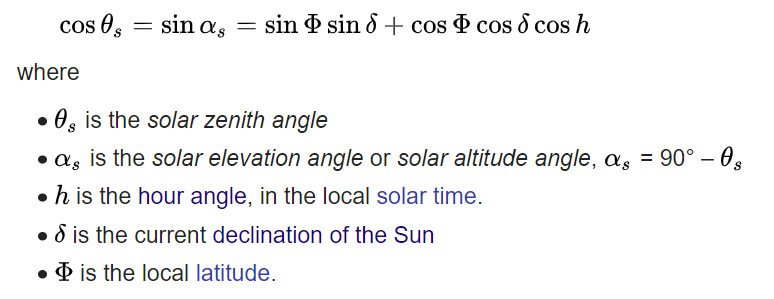

 
At 0 degrees latitude...
average noon elevation: 90       average noon zenith: 0
 
At 45 degrees latitude...
average noon elevation: 45       average noon zenith: 45
 
At 60 degrees latitude...
average noon elevation: 30       average noon zenith: 60


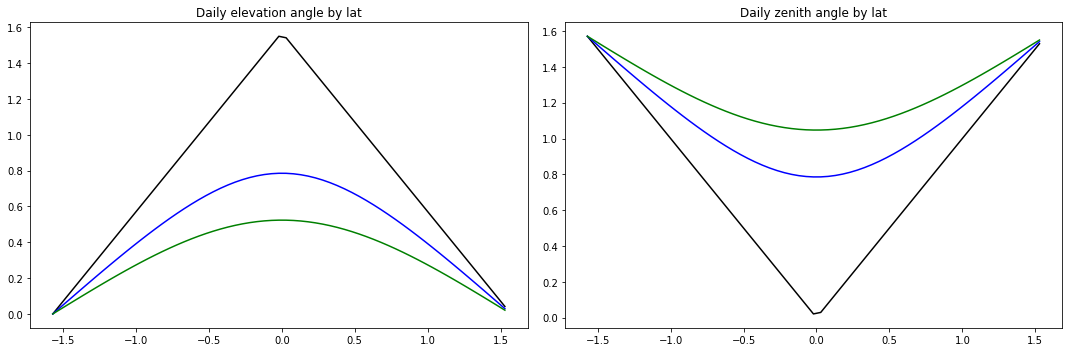

In [3]:
x = arange(-pi/2, pi/2, 0.05)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1,ax2 = axes[0],axes[1]
fig.tight_layout()

ax1.grid(which='major', axis='x')
ax2.grid(which='major', axis='x')

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
## ###ax.plot(x,b,'r')

for lat,colors in {0:['k','#ffcccc'], 45:['b','#ffff99'], 60:['g','#99ff99']}.items():

    latR = lat*pi/180
    z=cos(x)*cos(latR) # z equals the cos(zenith_angle)

    T = -0.0018*lat*lat+0.9127*lat #DEGREES: noon sun zenith targetted at optimum lat tilt
    el = 90-T #DEGREES: noon sun elevation targetted at optimum lat tilt
    print(" ")
    print("At "+ str(lat)+ " degrees latitude...")
    print("average noon elevation: "+ str(round(90-lat,1)) + "       average noon zenith: "+ str(round(lat,1)))
    #**print("targeted noon elevation: "+ str(round(el,1))   + "    targeted noon zenith: "+ str(round(T,1)))

    TR = T*pi/180 #RADIANS: noon sun elevation angle targetted at optimum lat tilt
    elR = pi/2-TR #RADIANS: noon sun zenith targetted at optimum lat tilt

    avg_sunElevationByLat = arccos(-cos(x)*cos(latR))-pi/2
    ax1.plot(x,avg_sunElevationByLat, colors[0])

    targetted_sunElevationByLat = arccos(-cos(x)*cos(TR))-pi/2
    #ax1.plot(x,targetted_sunElevationByLat, colors[0])
    #***ax1.fill_between(x, 0, targetted_sunElevationByLat, color=colors[1])
    
    avg_sunZenithByLat = arccos(cos(x)*cos(latR))
    ax2.plot(x,avg_sunZenithByLat, colors[0])


    targetted_sunZenithByLat = arccos(cos(x)*cos(TR))
    #ax2.plot(x,targetted_sunZenithByLat, colors[0])
    #***ax2.fill_between(x, pi/2, targetted_sunZenithByLat, color=colors[1])

# Title and format charts
ax1.set_title("Daily elevation angle by lat")
ax2.set_title("Daily zenith angle by lat")
ax1.grid(which='major', axis='x')
ax2.grid(which='major', axis='x')
fig.tight_layout()

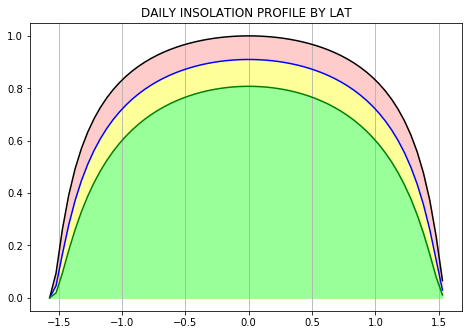

In [4]:
x = arange(-pi/2, pi/2, 0.05)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


for lat,colors in {0:['k','#ffcccc'], 45:['b','#ffff99'], 60:['g','#99ff99']}.items():
    
    lat = lat*pi/180
    
    z=cos(x)*cos(lat) # z=cos(zenith)
    y=0.7**(1/z)**0.678*(1/0.7)  #same thing as #y=0.7**((1/(cos(x/2)*cos(lat)))**0.678)*(1/0.7)
    
    ax.plot(x,y, colors[0])
    ax.fill_between(x, 0, y, color=colors[1])
    

ax.set_title("DAILY INSOLATION PROFILE BY LAT")
ax.grid(which='major', axis='x')

<br><br>
<h1 style="text-align:center">*END INSOLATION SECTION; BEGIN TECH-SPECIFIC CAPTURE.*</h1>
<br><br>
<br><h1 style="text-align:center">FIXED:   f(x)=cos(x)</h1>
<h6 style="text-align:center">*has height of 1, half period from -pi/2 to pi/2.</h6>
<br>

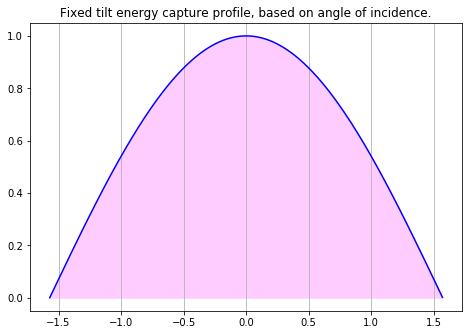

In [5]:
x = arange(-pi/2, pi/2, 0.01)
y = cos(x)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y, 'b')
ax.fill_between(x, 0, y, color='#ffccff')
ax.set_title("Fixed tilt energy capture profile, based on angle of incidence.")
ax.grid(which='major', axis='x')

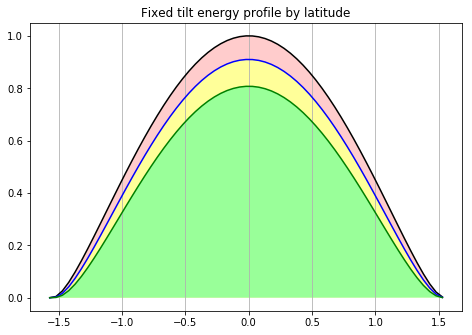

In [6]:
x = arange(-pi/2, pi/2, 0.05)
#y = cos(x)*(0.7**((1/cos(x))**0.678)*(1/(0.7)))#*exp(1-1/cos(x/2)) #*cos(x/2) better approximates behavior at equator

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

results = {}

for lat, colors in {0:['k','#ffcccc'], 45:['b','#ffff99'], 60:['g','#99ff99']}.items():
    
    T = -0.0018*lat*lat+0.9127*lat
    TR = T*pi/180
    
    z=cos(x)*cos(lat*pi/180)#TR)
    y=cos(x)*0.7**(1/z)**0.678*(1/0.7)

    ax.plot(x,y, colors[0])
    
    function = lambda x: cos(x)*0.7**(1/(cos(x)*cos(TR)))**0.678*(1/0.7)
    result = integrate.quad(function, -pi/2, pi/2)

    results[lat]=round(result[0],3)
    
    ax.fill(x, y, colors[1])

ax.set_title("Fixed tilt energy profile by latitude")#; integrals = "+str(results))
ax.grid(which='major', axis='x')

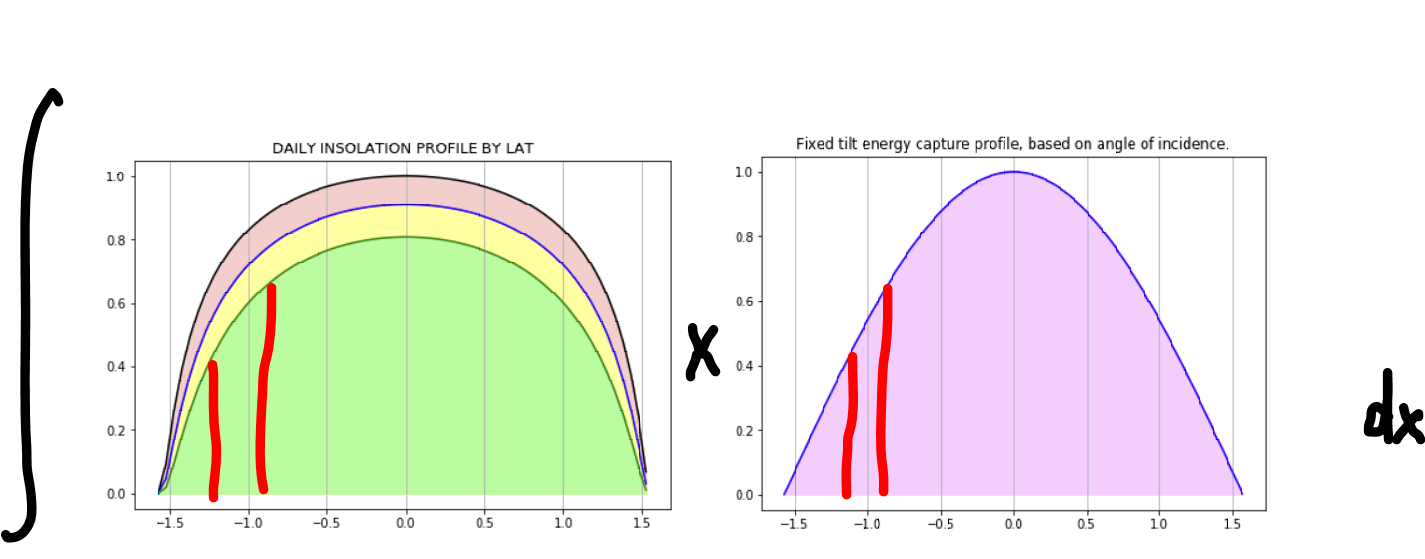

<h1 style="text-align:center">f(x)=k*(cos(x)+1)</h1>
<h6 style="text-align:center">*From -pi/2 to pi/2; a function for radiation incidence throughout the day for 1AT, varying by latitude.</h6>

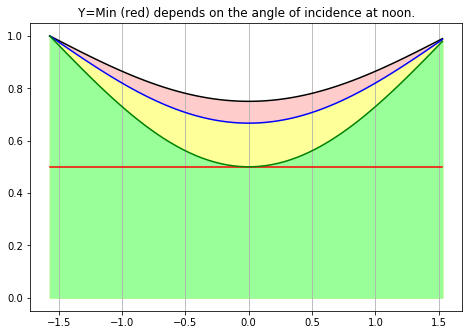

In [7]:
x = arange(-pi/2, pi/2, 0.05)
y1 = 0*x+1/2

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y1,'r')

for k,cols in {-1/4:['k','#ffcccc'], -1/3:['b','#ffff99'], -1/2:['g','#99ff99']}.items():
    y = cos(x)*k+1 #not cos^2 as shortly thought
    ax.plot(x,y, cols[0])
    ax.fill_between(x, 0, y, color=cols[1])

ax.set_title("Y=Min (red) depends on the angle of incidence at noon.")
ax.grid(which='major', axis='x')

<h4 style="text-align:center">Where constant (k) relates to y-intercept (y<sub>0</sub>) by: </h4>
<h1 style="text-align:center">k=y<sub>0</sub>-1</h1>
<h4 style="text-align:center">Which depends on optimum tilt (T) at latitude (L), like:</h4>
<h1 style="text-align:center">y<sub>0</sub>=cos(T)</h1>
<h1 style="text-align:center">T=-0.0018L<sup>2</sup> + 0.9127L</h1>

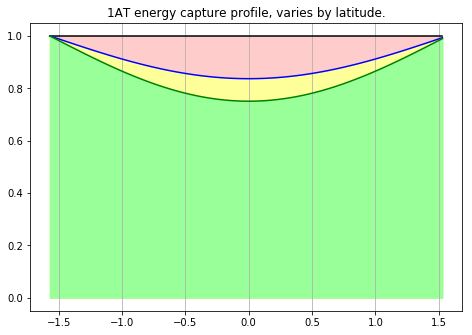

In [8]:
x = arange(-pi/2, pi/2, 0.05)
y1 = 0*x+1/2

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.plot(x,b,'r')

for lat,colors in {0:['k','#ffcccc'], 45:['b','#ffff99'], 80:['g','#99ff99']}.items():
    
    latR = lat*pi/180

    T = -0.0018*lat*lat+0.9127*lat #DEGREES: noon sun zenith targetted at optimum lat tilt
    el = 90-T #DEGREES: noon sun elevation targetted at optimum lat tilt

    TR = T*pi/180 #RADIANS: noon sun elevation angle targetted at optimum lat tilt
    elR = pi/2-TR #RADIANS: noon sun zenith targetted at optimum lat tilt

    avg_sunElevationByLat = arccos(-cos(x)*cos(latR))-pi/2
    targetted_sunElevationByLat = arccos(-cos(x)*cos(TR))-pi/2
    avg_sunZenithByLat = arccos(cos(x)*cos(latR))
    targetted_sunZenithByLat = arccos(cos(x)*cos(TR))
    
    #ax1.plot(x,targetted_sunElevationByLat, colors[0])
    #ax1.fill_between(x, 0, targetted_sunElevationByLat, color=colors[1])
    
    z=cos(x)*cos(TR) # z equals the cos(zenith_angle)
    
    y0 = cos(TR)
    k=y0-1
    
    #print(TR)
    #print(y0)
    
    y = z*k+1
    ax.plot(x,y,colors[0])
    ax.fill_between(x, 0, y, color=colors[1])
    ax.set_title("1AT energy capture profile, varies by latitude.")

ax.grid(which='major', axis='x')

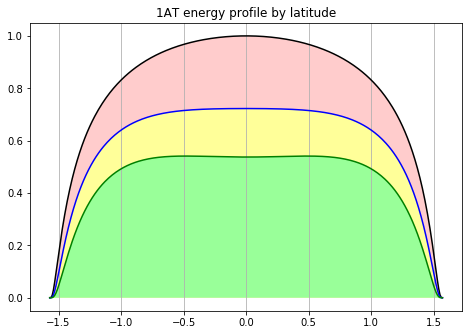

In [9]:
x = arange(-pi/2, pi/2, 0.01)
#y = cos(x)*(0.7**((1/cos(x))**0.678)*(1/(0.7)))#*exp(1-1/cos(x/2)) #*cos(x/2) better approximates behavior at equator

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

results = {}

for lat, colors in {0:['k','#ffcccc'], 45:['b','#ffff99'], 60:['g','#99ff99']}.items(): #59.3 original breakeven
    
    T = -0.0018*lat*lat+0.9127*lat
    TR = TR*pi/180
    y0 = cos(T*pi/180)
    k=y0-1
    
    latR = lat*pi/180
    
    z=cos(x)*cos(latR)#TR)
    
    y=(cos(x)*k+1)*0.7**(1/z)**0.678*(1/0.7)

    ax.plot(x,y, colors[0])
    
    function = lambda x: (cos(x)*k+1)*0.7**(1/(cos(x)*cos(TR)))**0.678*(1/0.7)
    result = integrate.quad(function, -pi/2, pi/2)

    results[lat]=round(result[0],3)
    
    ax.fill(x, y, colors[1])


ax.set_title("1AT energy profile by latitude")#; integrals = "+ str(results))
ax.grid(which='major', axis='x')

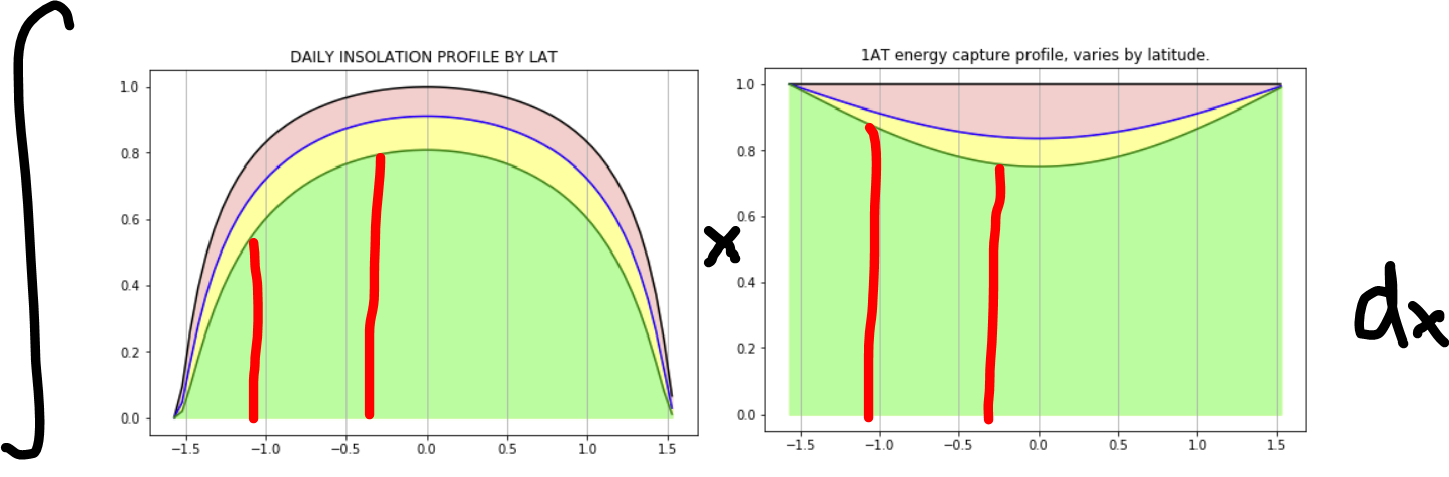

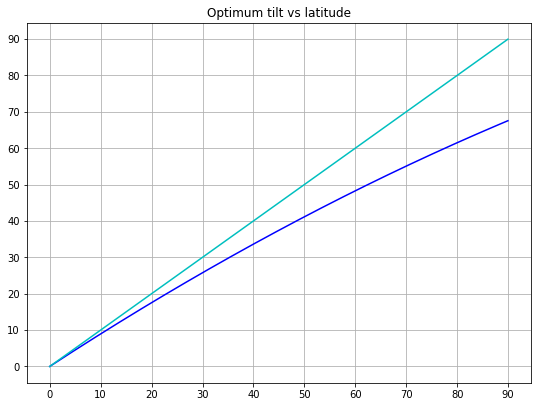

In [10]:
L = arange(0, 90, 0.05)
T = -0.0018*L*L+0.9127*L

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])

ax.plot(L, T, 'b')
ax.plot(L, L, 'c')

ax.set_title("Optimum tilt vs latitude")

major_ticks = arange(0, 91, 10) # Major ticks every 20
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)

ax.grid(which='major', axis='x')
ax.grid(which='major', axis='y')

{0: '37.7% gain', 36: '22.9% gain', 61.38: '0.0% gain'}


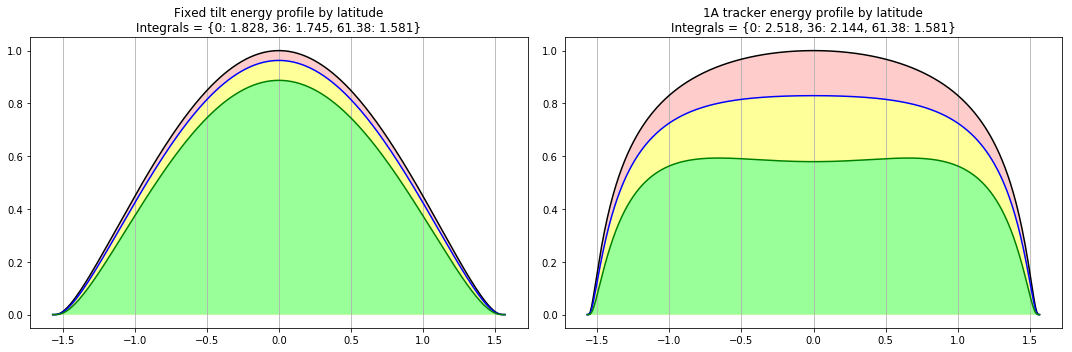

In [7]:
x = arange(-pi/2, pi/2, 0.01)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1,ax2 = axes[0],axes[1]

results1 = {}
results2 = {}
percent_gains = {}

for lat, colors in {0:['k','#ffcccc'], 36:['b','#ffff99'], 61.38:['g','#99ff99']}.items():
    
    #20:['m', '#99ff99'], 45:['k','#ffcccc'],
    
    T = -0.0018*lat*lat+0.9127*lat
    TR = T*pi/180
    
    # ###################################### Fixed tilt
    
    latR = lat*pi/180
    z=cos(x)*cos(latR)
    z=cos(x)*cos(T*pi/180)
    y1=cos(x)*0.7**(1/z)**0.678*(1/0.7)

    ax1.plot(x,y1, colors[0])
    
    functionA = lambda x: cos(x)*0.7**(1/(cos(x)*cos(TR)))**0.678*(1/0.7)
    resultA = integrate.quad(functionA, -pi/2, pi/2)

    results1[lat]=round(resultA[0],3)
    
    ax1.fill(x, y1, colors[1])
    
    # ###################################### 1A tracker
    

    y0 = cos(T*pi/180)
    k=y0-1
    
    y2=(cos(x)*k+1)*0.7**(1/z)**0.678*(1/0.7)

    ax2.plot(x,y2, colors[0])
    
    functionB = lambda x: (cos(x)*k+1)*0.7**(1/(cos(x)*cos(TR)))**0.678*(1/0.7)
    resultB = integrate.quad(functionB, -pi/2, pi/2)

    results2[lat]=round(resultB[0],3)
    
    percent_gains[lat]=str(round(100*((results2[lat]-results1[lat])/results1[lat]),1)) + "% gain"
    
    ax2.fill(x, y2, colors[1])
    
print(percent_gains)
    
# Title and format charts
ax1.set_title("Fixed tilt energy profile by latitude\nIntegrals = "+str(results1))
ax2.set_title("1A tracker energy profile by latitude\nIntegrals = "+str(results2))
ax1.grid(which='major', axis='x')
ax2.grid(which='major', axis='x')
fig.tight_layout()

In [9]:
# Math only:
PCT_gains = {}
for lat in range(90):
    
    Opta = -0.0018*lat*lat+0.9127*lat # generic function for optimum tilt
    rOpta = Opta*pi/180 # radians
    cosineZ = cos(x)*cos(rOpta) # cosine of the zenith angle
    
    yIntercept_1AT = cos(rOpta)
    k = yIntercept_1AT-1 # multiplier that sets noon-minimum based on angle of incidence for 1AT
    
    yFixed = cos(x)*0.7**(1/cosineZ)**0.678*(1/0.7)
    y1AT = (cos(x)*k+1)*0.7**(1/cosineZ)**0.678*(1/0.7) #could add the extra cos(x)* term after the first (
    
    pvOUTFixed_instantaneous = lambda x: cos(x)*0.7**(1/(cos(x)*cos(rOpta)))**0.678*(1/0.7)
    pvOutFixed = integrate.quad(pvOUTFixed_instantaneous, -pi/2, pi/2)

    pvOut1AT_instantaneous = lambda x: (cos(x)*k+1)*0.7**(1/(cos(x)*cos(rOpta)))**0.678*(1/0.7)
    pvOut1AT = integrate.quad(pvOut1AT_instantaneous, -pi/2, pi/2)
    
    PCT_gains[Opta]=100*(pvOut1AT[0]-pvOutFixed[0])/pvOutFixed[0] # integrations are expressed as a tuple (value, error)
    
for key,val in PCT_gains.items():
    print(key, val)

0.0 37.766813686209254
0.9108999999999999 37.75563549098331
1.8181999999999998 37.722279164609176
2.7218999999999998 37.66701381435337
3.622 37.59011072564299
4.5184999999999995 37.491843219802234
5.4113999999999995 37.37248651068991
6.3007 37.23231756050525
7.1864 37.07161493500137
8.0685 36.89065865851053
8.947 36.68973006793642
9.8219 36.46911166846971
10.6932 36.22908698784761
11.5609 35.96994043177935
12.424999999999999 35.691957139715335
13.2855 35.3954228412505
14.142399999999999 35.08062371327852
14.9957 34.747846238395766
15.8454 34.39737706271325
16.6915 34.029502856643695
17.534 33.64451028549234
18.372899999999998 33.242685431272754
19.208199999999998 32.82431427232389
20.0399 32.38968225453659
20.868 31.939074156719766
21.6925 31.472773872263932
22.5134 30.99106442302774
23.330699999999997 30.49422777971959
24.144399999999997 29.98254473353491
24.9545 29.456294769175297
25.761 28.915755939241915
26.563899999999997 28.36120473997913
27.3632 27.79291598834432
28.1589 27.2111

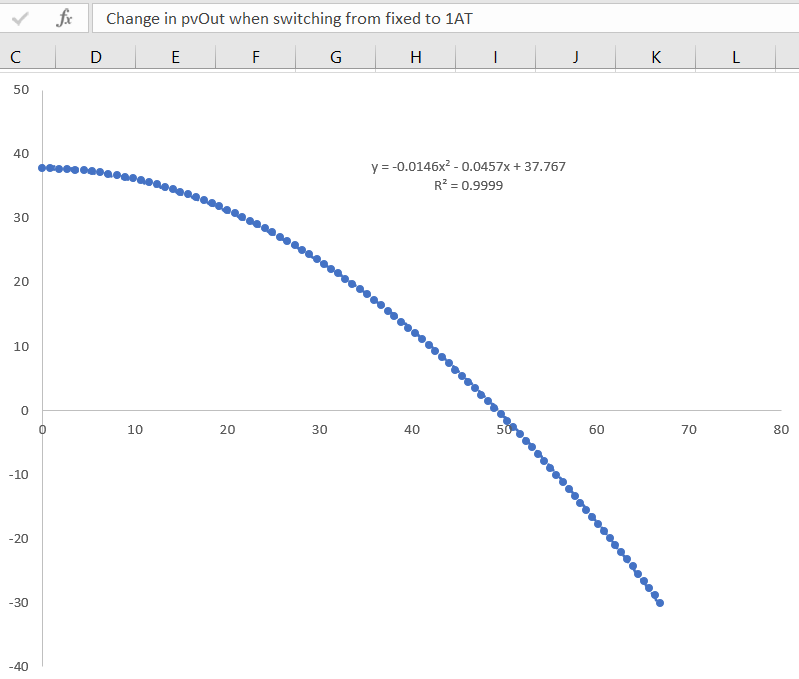

<h1 style="text-align:center">Above y-axis is in percent change, while x-axis is in degrees OPTA</h1>
<h1 style="text-align:center">Final formula: (opta in degrees)</h1>
<h1 style="text-align:center">y =  changeInPerformanceSwitchingFromFixedto1AT</h1>

<h1 style="text-align:center">y = (-0.0146*Opta<sup>2</sup> - 0.0457*Opta + 37.767) * (-Sin("DIF_PCT"*<sup>pi</sup>/<sub>2</sub>)+1)</h1>

<h6 style="text-align:center">(-0.0146*Raster(r"_GIS_Raster.DBO.Resource_Solar_OPTA_SolarGIS")*Raster(r"_GIS_Raster.DBO.Resource_Solar_OPTA_SolarGIS") - 0.0457*Raster(r"_GIS_Raster.DBO.Resource_Solar_OPTA_SolarGIS") + 37.767) * (-Sin(Raster(r"DIF_PCT")*3.14159265/2)+1)</h6>

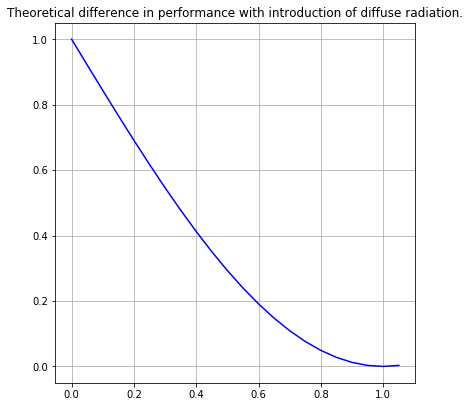

In [13]:
x = arange(0, 1.1, 0.05)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])

y = -sin(x*pi/2)+1
ax.plot(x,y, 'b')
#ax.fill_between(x, 0, y, color='#33ccff')

ax.set_title("Theoretical difference in performance with introduction of diffuse radiation.")                
ax.grid(which='major', axis='x')
ax.grid(which='major', axis='y')

<h3 style="text-align: center"><a href="https://gis.apexcleanenergy.com/portal/apps/webappviewer/index.html?id=c493359bd1914164bb025e9c23366d2a">Atlas 2.1</a></h3>